In [1]:
# import the stuff
from cetsp_bnb2.core import Circle, Instance, compute_tour_by_2opt, branch_and_bound, Point, plot_solution

In [2]:
# create a simple instance

import random
circles = [Circle(Point(x*0.4, y*0.4), 1) for x in range(16) for y in range(16)]
instance = Instance(circles)

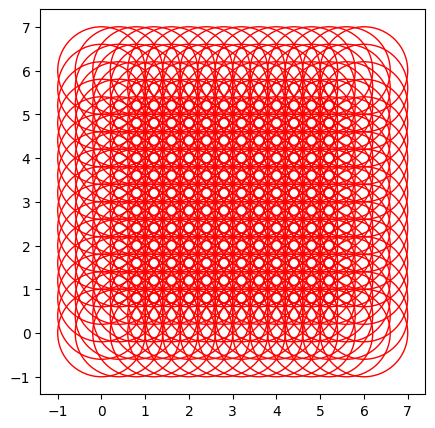

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, [])

In [4]:
# compute an initial solution via 2opt
initial_solution = compute_tour_by_2opt(instance)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-13


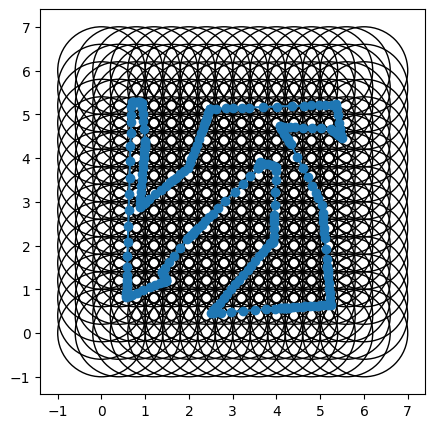

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, initial_solution)

In [6]:
initial_solution.length()

31.03716875596993

In [11]:
timelimit = 220
num_nodes_explored = 0
ub, lb = None, None
def count(event):
    #return
    global num_nodes_explored
    global ub
    global lb
    num_nodes_explored += 1
    ub = event.get_upper_bound()
    lb = event.get_lower_bound()
    return
    if not event.current_node.get_relaxed_solution().is_simple():
        event.current_node.prune()
        return
        print("crossing prune!", event.get_relaxed_solution().length())
        plt.figure(figsize=(5, 5))
        plot_solution(plt.gca(), instance, event.get_relaxed_solution(), highlight=event.current_node.get_fixed_sequence())
        plt.show()
        
opt_solution, lb = branch_and_bound(instance, count, initial_solution, timelimit, branching="ChFarthestCircleSimplifying")

Using ChFarthestCircle-Branching
Starting with root node of size 4
i	LB	|	UB
0	18.7729	|	31.0372
1	18.7729	|	31.0372
2	18.7729	|	31.0372
3	18.7729	|	31.0372
4	18.7729	|	31.0372
5	18.7729	|	31.0372
6	18.7729	|	31.0372
7	18.7729	|	31.0372
8	18.7729	|	31.0372
9	18.7729	|	31.0372
10	18.7729	|	31.0372
20	18.9524	|	21.0027
30	18.9909	|	21.0027
40	18.9909	|	21.0027
50	19.1162	|	21.0027
60	19.1162	|	21.0027
70	19.1162	|	21.0027
80	19.2684	|	21.0027
90	19.2684	|	21.0027
100	19.4853	|	21.0027
200	19.5281	|	21.0027
300	19.7615	|	21.0027
400	19.8286	|	21.0027
500	19.9246	|	21.0027
600	20.0554	|	21.0027
700	20.0872	|	21.0027
800	20.1712	|	20.9843
900	20.1935	|	20.9843
1000	20.2447	|	20.9843
2000	20.4885	|	20.9843
3000	20.6152	|	20.9843
4000	20.6961	|	20.9843
5000	20.761	|	20.9843
---------------
5176	20.7774	|	20.9843


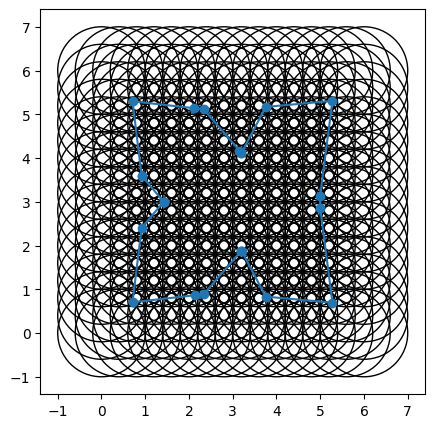

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, opt_solution)

In [9]:
num_nodes_explored, lb, ub

(7268, 20.602329224348892, 20.98433992579442)